In [1]:
import numpy as np
from PIL import Image
import os, glob, random

outfile = "/content/drive/MyDrive/人工知能/人工知能1/自分用/image/photos.npz" # 保存ファイル名
max_photo = 200 # 利用する写真の枚数
photo_size = 64 # 画像サイズ
x = [] # 画像データ
y = [] # ラベルデータ

def main():
    # 保存先フォルダのパス
    output_folder = os.path.dirname(outfile)

    # フォルダが存在しない場合は作成する
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 各画像のフォルダを読む
    glob_files("/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーオス", 0)
    glob_files("/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーメス", 1)

    # ファイルへ保存
    np.savez(outfile, x=x, y=y)
    print("保存しました:" + outfile, len(x))

# path以下の画像を読み込む
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)

    # 各ファイルを処理
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1

        # 画像ファイルを読む
        img = Image.open(f)
        img = img.convert("RGB") # 色空間をRGBに
        img = img.resize((photo_size, photo_size)) # サイズ変更
        img = np.asarray(img)
        x.append(img)
        y.append(label)

main()

保存しました:/content/drive/MyDrive/人工知能/人工知能1/自分用/image/photos.npz 200


Epoch 1/20
2/2 [==============================] - 4s 891ms/step - loss: 1.1618 - accuracy: 0.3375 - val_loss: 1.5879 - val_accuracy: 0.4250
Epoch 2/20
2/2 [==============================] - 3s 693ms/step - loss: 1.5988 - accuracy: 0.4938 - val_loss: 0.9521 - val_accuracy: 0.4750
Epoch 3/20
2/2 [==============================] - 5s 944ms/step - loss: 0.8746 - accuracy: 0.5188 - val_loss: 0.6867 - val_accuracy: 0.5750
Epoch 4/20
2/2 [==============================] - 3s 686ms/step - loss: 0.8100 - accuracy: 0.4938 - val_loss: 0.9137 - val_accuracy: 0.4250
Epoch 5/20
2/2 [==============================] - 3s 681ms/step - loss: 0.8406 - accuracy: 0.5188 - val_loss: 0.8159 - val_accuracy: 0.4250
Epoch 6/20
2/2 [==============================] - 3s 684ms/step - loss: 0.7324 - accuracy: 0.5188 - val_loss: 0.7052 - val_accuracy: 0.5750
Epoch 7/20
2/2 [==============================] - 4s 1s/step - loss: 0.6920 - accuracy: 0.5375 - val_loss: 0.6843 - val_accuracy: 0.7250
Epoch 8/20
2/2 [=======

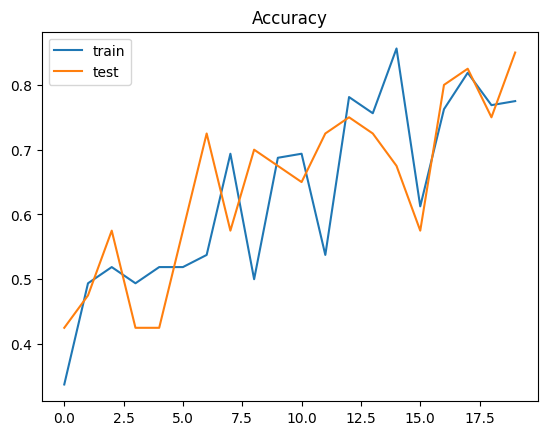

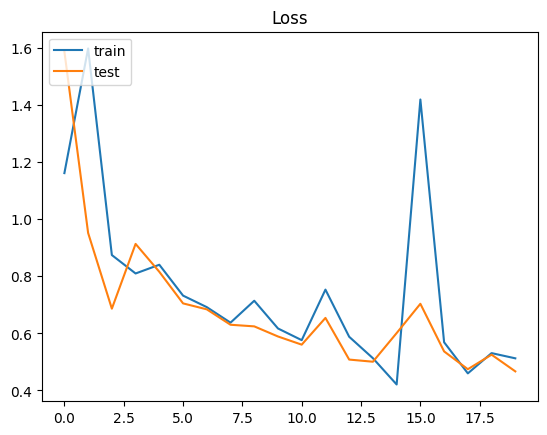

160
160
40
40


In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

# 入力と出力を指定 --- (*1)
im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み --- (*2)
photos = np.load('/content/drive/MyDrive/人工知能/人工知能1/自分用/image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 --- (*6)
model = get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

model.save_weights('/content/drive/MyDrive/人工知能/人工知能1/自分用/image/photos-model-light.hdf5')


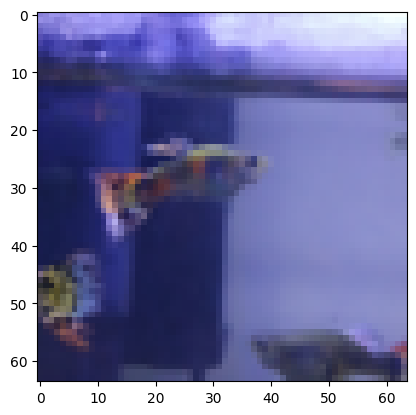

1/1 [==============================] - 0s 105ms/step
この写真は、 オス
可能性は、 73 %
※オスです。



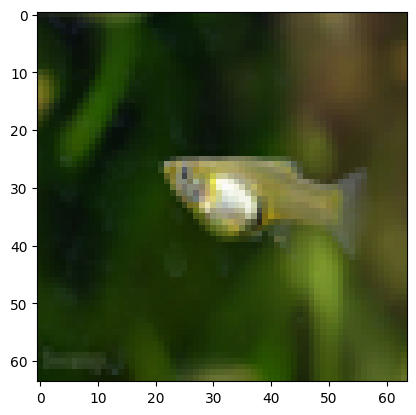

1/1 [==============================] - 0s 33ms/step
この写真は、 メス
可能性は、 62 %
※メスです。



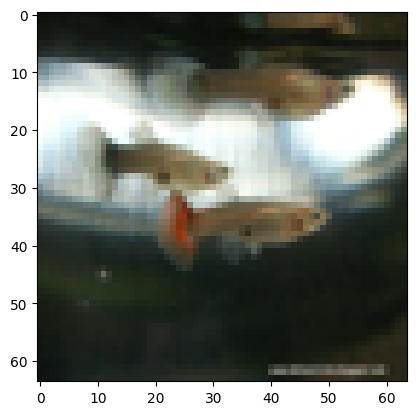

1/1 [==============================] - 0s 100ms/step
この写真は、 オス
可能性は、 74 %
※メスです。



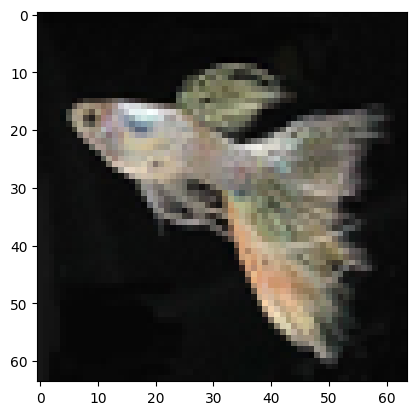

1/1 [==============================] - 0s 85ms/step
この写真は、 オス
可能性は、 99 %
※オスです。



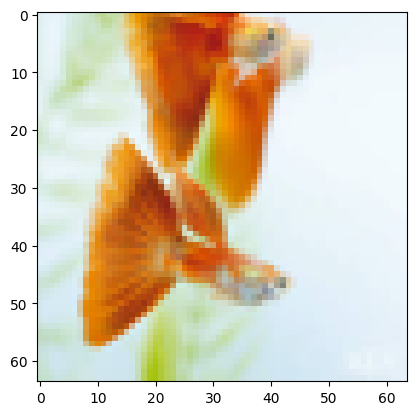

1/1 [==============================] - 0s 55ms/step
この写真は、 オス
可能性は、 61 %
※オスです。



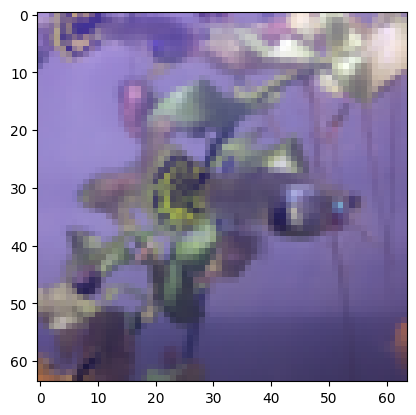

1/1 [==============================] - 0s 34ms/step
この写真は、 オス
可能性は、 58 %
※メスです。



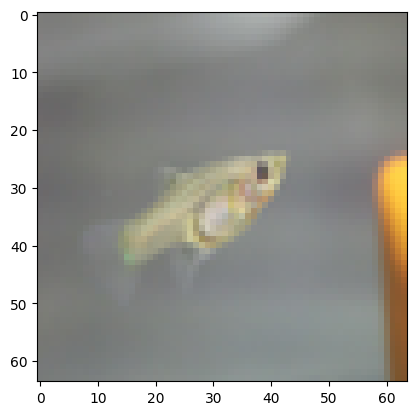

1/1 [==============================] - 0s 29ms/step
この写真は、 メス
可能性は、 49 %
※メスです。



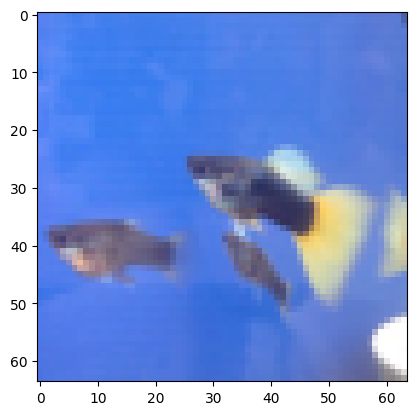

1/1 [==============================] - 0s 29ms/step
この写真は、 メス
可能性は、 55 %
※メスです。



In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["オス","メス"]

# 保存したCNNモデルを読み込む
model = get_model(in_shape, nb_classes)
model.load_weights('/content/drive/MyDrive/人工知能/人工知能1/自分用/image/photos-model-light.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 答えを表示
    print("この写真は、", LABELS[idx])
    print("可能性は、", per, "%")

if __name__ == '__main__':
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーオス/IMG_20200519_213148.jpg')
    print("※オスです。")
    print()
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーメス/16433526737_0df4bc840a_w.jpg')
    print("※メスです。")
    print()
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーメス/4686255259_99e3d185fd_n.jpg')
    print("※メスです。")
    print()
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーオス/P6250016.jpg')
    print("※オスです。")
    print()
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーオス/images (2).jpg')
    print("※オスです。")
    print()
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーメス/IMG_20200519_213128.jpg')
    print("※メスです。")
    print()
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーメス/9222928992_c734b127d2_w.jpg')
    print("※メスです。")
    print()
    check_photo_str('/content/drive/MyDrive/人工知能/人工知能1/自分用/グッピー/グッピーメス/7852134236_7b6c79ac26_n.jpg')
    print("※メスです。")
    print()